In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

In [4]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

In [5]:
print("Информация о наборе данных:")
print(df.describe())
print("\nКорреляции с целевой переменной:")
print(df.corr()['target'].sort_values(ascending=False))

Информация о наборе данных:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.

In [6]:
X = df[['bmi']].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Из прошлой лабы
def linear_regression(x, y, lr=0.01, accuracy=0.001, k=0, b=0, max_iterations=100000, freq=10):
    iteration=0
    mse_pred = 0
    mse_cur = 1

    while abs(mse_cur - mse_pred) > accuracy:
        iteration +=1
        y_pred = k * x + b
        error = y - y_pred

        k_grad = -2/x.shape[0] * np.sum(x * error)
        b_grad = -2/x.shape[0] * np.sum(error)

        k -= lr * k_grad
        b -= lr* b_grad

        mse_pred = mse_cur
        mse_cur = np.mean(error ** 2)
        
        if iteration >= max_iterations:
            print('Достигнуто максимальное количество итераций, mse = ', mse_cur)
            break

    return k, b

In [8]:
k, b = linear_regression(x=X_train.squeeze(), y=y_train.squeeze())

In [9]:
print("\nКоэффициенты моделей:")
print(f"Scikit-Learn: w = {sklearn_model.coef_[0]:.4f}, b = {sklearn_model.intercept_:.4f}")
print(f"Собственная модель: w = {k:.4f}, b = {b:.4f}")



Коэффициенты моделей:
Scikit-Learn: w = 998.5777, b = 152.0034
Собственная модель: w = 927.6370, b = 152.1268


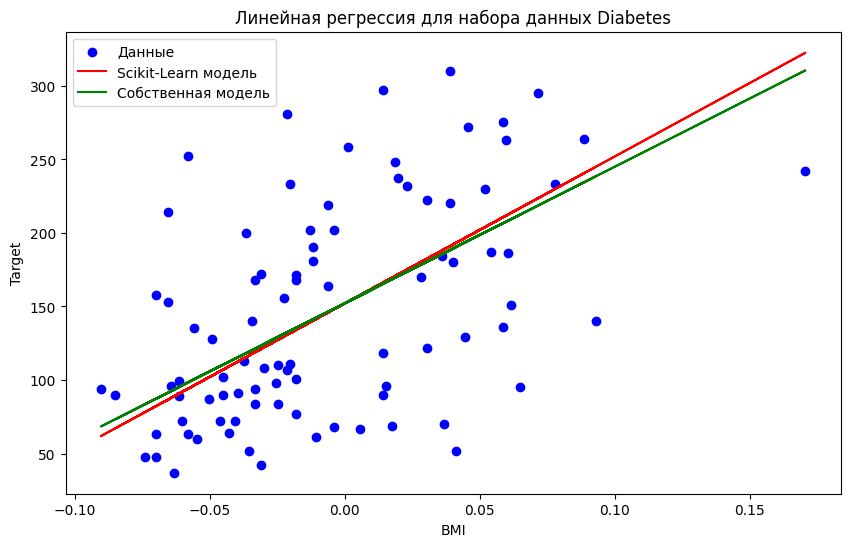

In [10]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Данные')
plt.plot(X_test, sklearn_model.predict(X_test), color='red', label='Scikit-Learn модель')
plt.plot(X_test, k * X_test + b, color='green', label='Собственная модель')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Линейная регрессия для набора данных Diabetes')
plt.legend()
plt.show() 

результаты получились схожими, с моей реаллизацией, можно добиться совпадения прямых подкрутив параметры точности и кол-ва итераций и лернинг рейта

метрики для задания из лр 1.3

In [21]:
y_pred = sklearn_model.predict(X_test)
y_pred_my = [(x*k + b) for x in X_test]

In [22]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:

print("\nМетрики для Scikit-Learn модели:")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}%")

print("\nМетрики для собственной модели:")
print(f"MAE: {mean_absolute_error(y_test.squeeze(), y_pred_my):.4f}")
print(f"R2: {r2_score(y_test.squeeze(), y_pred_my):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test.squeeze(), y_pred_my):.4f}%")



Метрики для Scikit-Learn модели:
MAE: 52.25997644534553
R2: 0.2334
MAPE: 45.8775%

Метрики для собственной модели:
MAE: 52.2620
R2: 0.2459
MAPE: 63.5851%


различаются не сильно как и ожидалось, можно корректировать параметрами